# задание №1

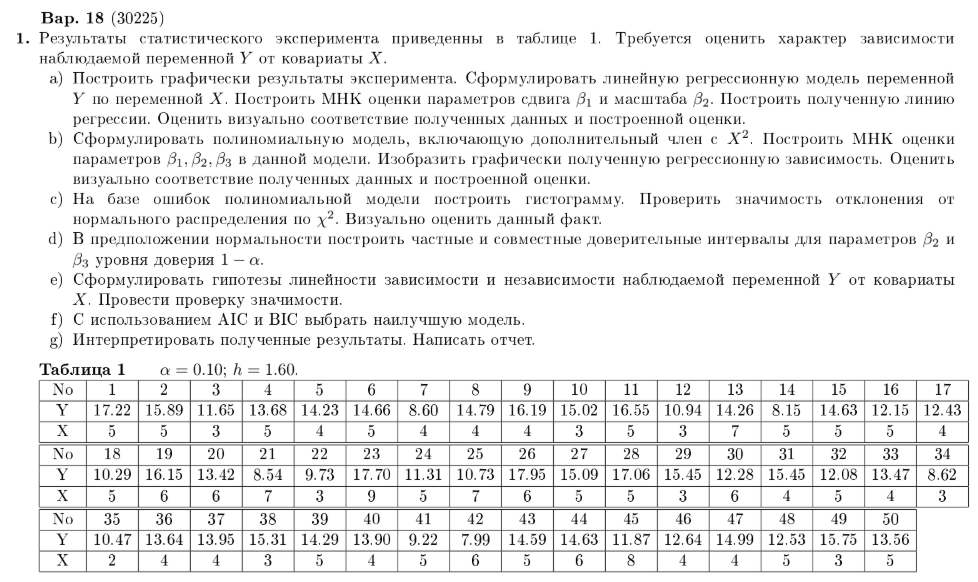

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
sns.set_style("whitegrid")

alpha = 0.10
h = 1.60

Y_data = [
    17.22, 15.89, 11.65, 13.68, 14.23, 14.66, 8.60, 14.79, 16.19, 15.02, 16.55, 10.94, 14.26, 8.15, 14.63, 12.15, 12.43,
    10.29, 16.15, 13.42, 8.54, 9.73, 17.70, 11.31, 10.73, 17.95, 15.09, 17.06, 15.45, 12.28, 15.45, 12.08, 13.47, 8.62,
    10.47, 13.64, 13.95, 15.31, 14.29, 13.90, 9.22, 7.99, 14.59, 14.63, 11.87, 12.64, 14.99, 12.53, 15.75, 13.56
]

X_data = [
    5, 5, 3, 5, 4, 5, 4, 4, 4, 3, 5, 3, 7, 5, 5, 5, 4,
    5, 6, 6, 7, 3, 9, 5, 7, 6, 5, 5, 3, 6, 4, 5, 4, 3,
    2, 4, 4, 3, 5, 4, 5, 6, 5, 6, 8, 4, 4, 5, 3, 5
]

df = pd.DataFrame({
    'X': X_data,
    'Y': Y_data
})

## Пункт a

Оценки параметров модели:
Параметр сдвига (beta_1): 12.5457
Параметр масштаба (beta_2): 0.1614

Полная сводка по модели:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3447
Date:                Thu, 18 Dec 2025   Prob (F-statistic):              0.560
Time:                        02:05:42   Log-Likelihood:                -118.70
No. Observations:                  50   AIC:                             241.4
Df Residuals:                      48   BIC:                             245.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

C:\Users\tem\AppData\Local\Temp\ipykernel_22572\377273330.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


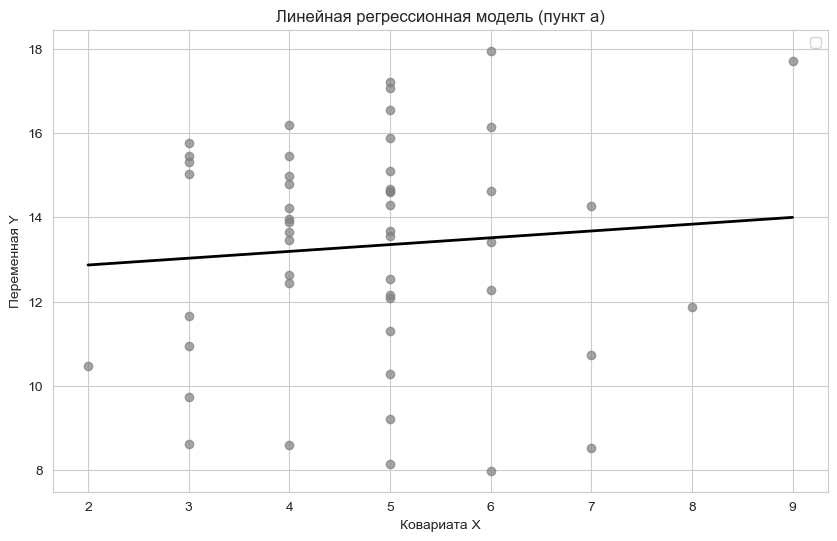

In [13]:
X_const = sm.add_constant(df['X'])

model_linear = sm.OLS(df['Y'], X_const).fit()

print("Оценки параметров модели:")
print(f"Параметр сдвига (beta_1): {model_linear.params['const']:.4f}")
print(f"Параметр масштаба (beta_2): {model_linear.params['X']:.4f}")
print("\nПолная сводка по модели:")
print(model_linear.summary())

plt.figure(figsize=(10, 6))

plt.scatter(df['X'], df['Y'], alpha=0.7, color='grey')

X_plot = np.linspace(df['X'].min(), df['X'].max(), 100)
X_plot_const = sm.add_constant(X_plot)
Y_pred = model_linear.predict(X_plot_const)

plt.plot(X_plot, Y_pred, color='black', linewidth=2)

plt.title('Линейная регрессионная модель (пункт а)')
plt.xlabel('Ковариата X')
plt.ylabel('Переменная Y')
plt.legend()
plt.grid(True)
plt.show()


## Пункт b

Оценки параметров модели (b):
beta_1 (const): 11.9441
beta_2 (X):     0.4108
beta_3 (X^2):   -0.0239




C:\Users\tem\AppData\Local\Temp\ipykernel_22572\111983362.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


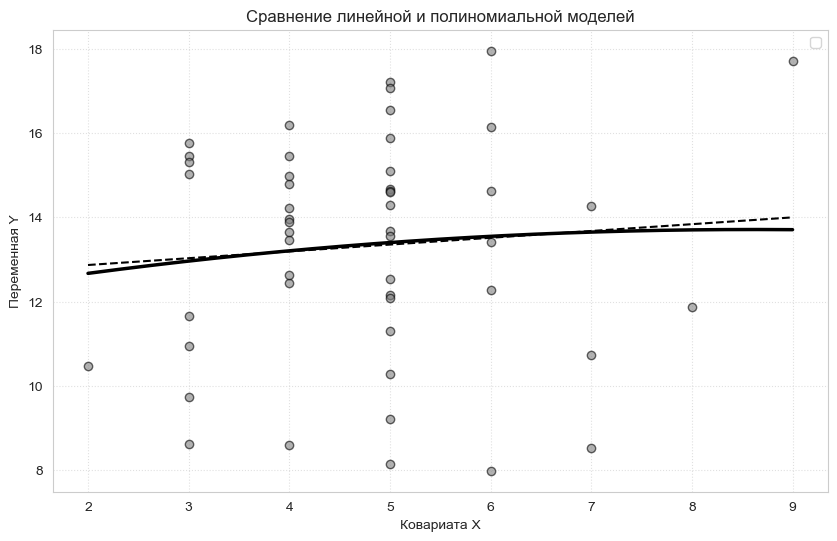

In [5]:
X_const = sm.add_constant(df['X'])
model_linear = sm.OLS(df['Y'], X_const).fit()

df['X2'] = df['X'] ** 2
X_poly = sm.add_constant(df[['X', 'X2']])
model_poly = sm.OLS(df['Y'], X_poly).fit()

print("Оценки параметров модели (b):")
print(f"beta_1 (const): {model_poly.params['const']:.4f}")
print(f"beta_2 (X):     {model_poly.params['X']:.4f}")
print(f"beta_3 (X^2):   {model_poly.params['X2']:.4f}")
print("\n" + "="*40 + "\n")

plt.figure(figsize=(10, 6))

plt.scatter(df['X'], df['Y'], color='gray', alpha=0.6, edgecolors='black')

X_range = np.linspace(df['X'].min(), df['X'].max(), 200)

Y_lin_pred = model_linear.params['const'] + model_linear.params['X'] * X_range
plt.plot(X_range, Y_lin_pred, color='black', linestyle='--', linewidth=1.5)

Y_poly_pred = model_poly.params['const'] + model_poly.params['X'] * X_range + model_poly.params['X2'] * (X_range**2)
plt.plot(X_range, Y_poly_pred, color='black', linestyle='-', linewidth=2.5)

plt.title('Сравнение линейной и полиномиальной моделей')
plt.xlabel('Ковариата X')
plt.ylabel('Переменная Y')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)


## Пункт C

Гистограмма ошибок

C:\Users\tem\AppData\Local\Temp\ipykernel_22572\1879201773.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


(-6.558923937529125, 5.4010760624708745)

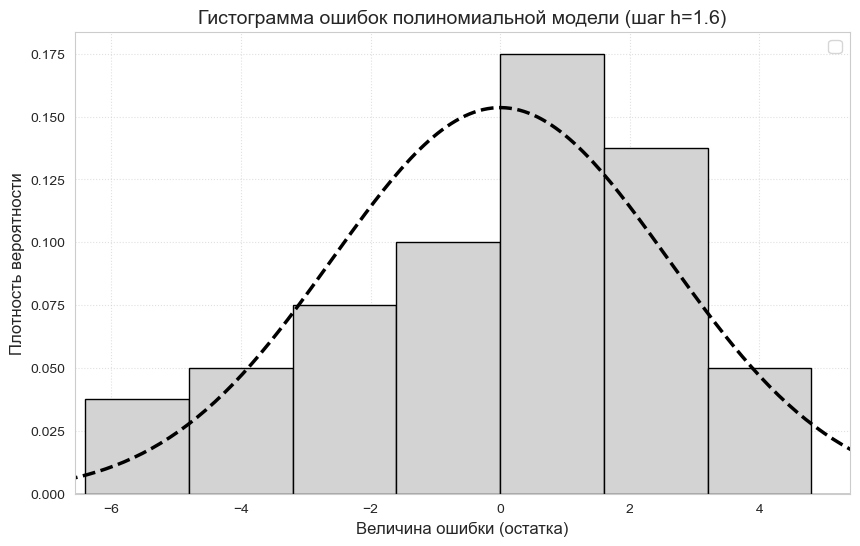

In [6]:
residuals = model_poly.resid
n = len(residuals)


plt.figure(figsize=(10, 6))

mu_hat, sigma_hat = stats.norm.fit(residuals)

max_abs = max(abs(residuals.min()), abs(residuals.max()))
num_steps = int(np.ceil(max_abs / h))

bins_grid = np.arange(-(num_steps+1)*h, (num_steps+2)*h, h)

plt.hist(residuals, bins=bins_grid, density=True, color='lightgray', edgecolor='black')

x_plot = np.linspace(min(residuals)-2, max(residuals)+2, 200)
pdf_plot = stats.norm.pdf(x_plot, mu_hat, sigma_hat)
plt.plot(x_plot, pdf_plot, 'k--', linewidth=2.5)

plt.title(f'Гистограмма ошибок полиномиальной модели (шаг h={h})', fontsize=14)
plt.xlabel('Величина ошибки (остатка)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(min(residuals)-1, max(residuals)+1)


Рассчет критерия Пирсона с объединением интервалов

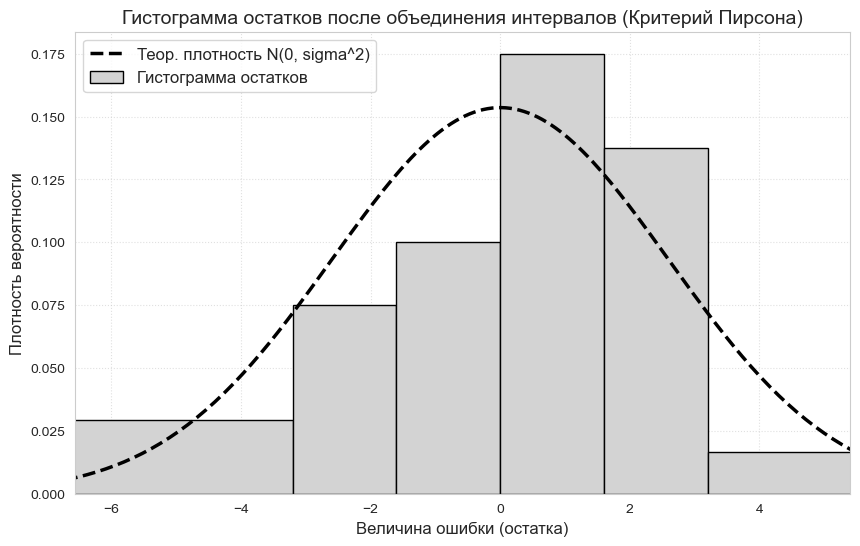


ДЕТАЛИЗАЦИЯ РАСЧЕТА (ДЛЯ ОТВЕТА ПРЕПОДАВАТЕЛЮ)
Параметры распределения остатков:
  mu_hat (среднее)    = -0.0000
  sigma_hat (ст.откл) = 2.5978
--------------------------------------------------------------------------------
Интервал [a; b)           z_a      z_b      P_j (prob)   E_j (exp)  O_j (obs) 
--------------------------------------------------------------------------------
[ -8.000;  -3.200)        -3.080   -1.232     0.1082      5.410 7         
[ -3.200;  -1.600)        -1.232   -0.616     0.1603      8.015 6         
[ -1.600;  -0.000)        -0.616    0.000     0.2315     11.575 8         
[ -0.000;   1.600)         0.000    0.616     0.2315     11.575 14        
[  1.600;   3.200)         0.616    1.232     0.1603      8.015 11        
[  3.200;   8.000)         1.232    3.080     0.1082      5.410 4         

Chi2 statistic: 4.0653
Degrees of freedom: 4
Critical value (alpha=0.1): 7.7794
P-value: 0.3972

ВЫВОД: Гипотеза о нормальности остатков ПРИНИМАЕТСЯ.


In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Предполагается, что переменные residuals, bins_grid, mu_hat, sigma_hat, n, alpha уже определены ранее
# Например:
# n = 50
# alpha = 0.10
# residuals = ... (массив остатков)
# mu_hat = 0
# sigma_hat = np.std(residuals, ddof=1) # или scale из модели
# bins_grid = np.arange(...)

# --- Начало блока обработки гистограммы ---

observed_counts, bin_edges = np.histogram(residuals, bins=bins_grid)

# Расчет вероятностей попадания в интервалы
cdf_vals = stats.norm.cdf(bin_edges, mu_hat, sigma_hat)
probs = np.diff(cdf_vals)

# Нормировка (так как теоретическое распределение бесконечно, а гистограмма конечна)
probs = probs / probs.sum()
expected_counts = probs * n

min_expected = 5.0

merged_obs = []
merged_exp = []
merged_intervals = []

current_o = 0
current_e = 0
start_edge = bin_edges[0]

for i in range(len(observed_counts)):
    current_o += observed_counts[i]
    current_e += expected_counts[i]
    
    if current_e >= min_expected:
        merged_obs.append(current_o)
        merged_exp.append(current_e)
        merged_intervals.append((start_edge, bin_edges[i+1]))

        current_o = 0
        current_e = 0
        start_edge = bin_edges[i+1]

if current_e > 0:
    if len(merged_exp) > 0:
        merged_obs[-1] += current_o
        merged_exp[-1] += current_e
        prev_start, _ = merged_intervals[-1]
        merged_intervals[-1] = (prev_start, bin_edges[i+1])
    else:
        merged_obs.append(current_o)
        merged_exp.append(current_e)
        merged_intervals.append((start_edge, bin_edges[i+1]))

merged_obs = np.array(merged_obs)
merged_exp = np.array(merged_exp)

# --- Визуализация ---
plt.figure(figsize=(10, 6))

widths = []
centers = []
densities = []

for (start, end), count in zip(merged_intervals, merged_obs):
    width = end - start
    widths.append(width)
    centers.append((start + end) / 2)
    densities.append(count / (n * width))

plt.bar(centers, densities, width=widths, align='center',
        color='lightgray', edgecolor='black', label='Гистограмма остатков')

x_plot = np.linspace(min(residuals)-2, max(residuals)+2, 200)
pdf_plot = stats.norm.pdf(x_plot, mu_hat, sigma_hat)
plt.plot(x_plot, pdf_plot, 'k--', linewidth=2.5, label='Теор. плотность N(0, sigma^2)')

plt.title('Гистограмма остатков после объединения интервалов (Критерий Пирсона)', fontsize=14)
plt.xlabel('Величина ошибки (остатка)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(min(residuals)-1, max(residuals)+1)
plt.show()

# --- Расчет статистики Хи-квадрат ---
chi2_stat = np.sum((merged_obs - merged_exp)**2 / merged_exp)

k = len(merged_obs)
p_params = 1 # Оцениваем только дисперсию (mu=0)
df = k - 1 - p_params

# --- Вывод результатов ---

if df <= 0:
    print("ВНИМАНИЕ: Недостаточно степеней свободы для корректного теста (мало интервалов).")
else:
    chi2_crit = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    # --- БЛОК ДЕТАЛИЗАЦИИ ДЛЯ ОТЧЕТА (ОБНОВЛЕННЫЙ) ---
    print("\n" + "="*80)
    print("ДЕТАЛИЗАЦИЯ РАСЧЕТА (ДЛЯ ОТВЕТА ПРЕПОДАВАТЕЛЮ)")
    print("="*80)
    print(f"Параметры распределения остатков:")
    print(f"  mu_hat (среднее)    = {mu_hat:.4f}")
    print(f"  sigma_hat (ст.откл) = {sigma_hat:.4f}")
    print("-" * 80)
    
    # Добавлен столбец O_j (Obs)
    print(f"{'Интервал [a; b)':<25} {'z_a':<8} {'z_b':<8} {'P_j (prob)':<12} {'E_j (exp)':<10} {'O_j (obs)':<10}")
    print("-" * 80)
    
    for i, ((low, high), exp_val, obs_val) in enumerate(zip(merged_intervals, merged_exp, merged_obs)):
        
        # Считаем z-score
        z_low = (low - mu_hat) / sigma_hat
        z_high = (high - mu_hat) / sigma_hat
        
        prob_from_exp = exp_val / n
        
        print(f"[{low:7.3f}; {high:7.3f})      {z_low:8.3f} {z_high:8.3f} {prob_from_exp:10.4f} {exp_val:10.3f} {int(obs_val):<10}")
        
    print("="*80 + "\n")
    # -------------------------------------------

    print(f"Chi2 statistic: {chi2_stat:.4f}")
    print(f"Degrees of freedom: {df}")
    print(f"Critical value (alpha={alpha}): {chi2_crit:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if chi2_stat < chi2_crit:
        print("\nВЫВОД: Гипотеза о нормальности остатков ПРИНИМАЕТСЯ.")
    else:
        print("\nВЫВОД: Гипотеза о нормальности остатков ОТВЕРГАЕТСЯ.")


## Пункт D

In [ ]:
params = model_poly.params
bse = model_poly.bse
n = int(model_poly.nobs)
p = len(params)
df = n - p
alpha = 0.10

# Квантиль Стьюдента для частных интервалов (1 - alpha/2)
t_crit = stats.t.ppf(1 - alpha/2, df)

# Квантиль Стьюдента для совместных интервалов Бонферрони (1 - alpha/4)
m = 2
t_bonf = stats.t.ppf(1 - alpha/(2*m), df)

print(f"Число степеней свободы df = {df}")
print(f"Уровень значимости alpha = {alpha}")
print("-" * 40)

print("ЧАСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень 1-alpha):")
print(f"t_crit = {t_crit:.4f}")

b2 = params['X']
se2 = bse['X']
ci_b2 = (b2 - t_crit * se2, b2 + t_crit * se2)
print(f"Beta_2: {b2:.4f} +/- {t_crit:.4f}*{se2:.4f}  =>  [{ci_b2[0]:.4f}; {ci_b2[1]:.4f}]")

b3 = params['X2']
se3 = bse['X2']
ci_b3 = (b3 - t_crit * se3, b3 + t_crit * se3)
print(f"Beta_3: {b3:.4f} +/- {t_crit:.4f}*{se3:.4f}  =>  [{ci_b3[0]:.4f}; {ci_b3[1]:.4f}]")

print("-" * 40)

print("СОВМЕСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (Метод Бонферрони, m=2):")
print(f"t_bonf = {t_bonf:.4f} (квантиль для 1 - {alpha}/4)")

ci_bonf_b2 = (b2 - t_bonf * se2, b2 + t_bonf * se2)
print(f"Beta_2: [{ci_bonf_b2[0]:.4f}; {ci_bonf_b2[1]:.4f}]")

ci_bonf_b3 = (b3 - t_bonf * se3, b3 + t_bonf * se3)
print(f"Beta_3: [{ci_bonf_b3[0]:.4f}; {ci_bonf_b3[1]:.4f}]")


Число степеней свободы df = 47
Уровень значимости alpha = 0.1
----------------------------------------
ЧАСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень 1-alpha):
t_crit = 1.6779
Beta_2: 0.4108 +/- 1.6779*1.4099  =>  [-1.9549; 2.7765]
Beta_3: -0.0239 +/- 1.6779*0.1324  =>  [-0.2460; 0.1983]
----------------------------------------
СОВМЕСТНЫЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (Метод Бонферрони, m=2):
t_bonf = 2.0117 (квантиль для 1 - 0.1/4)
Beta_2: [-2.4255; 3.2472]
Beta_3: [-0.2902; 0.2424]


# Пункт e

In [9]:
# --- Подпункт 1: Гипотеза линейности (H0: beta3 = 0) ---
print("\n1. Проверка гипотезы линейности (H0: beta3 = 0)")

# Получаем значения из модели
beta3_hat = model_poly.params['X2']
se_beta3 = model_poly.bse['X2']
t_stat_beta3 = model_poly.tvalues['X2'] # или beta3_hat / se_beta3
df_resid = int(model_poly.df_resid) # n - p = 50 - 3 = 47

# Расчет критического значения и P-value
t_crit = stats.t.ppf(1 - alpha/2, df_resid)
p_val_beta3 = model_poly.pvalues['X2']

print(f"  Оценка beta3:      {beta3_hat:.4f}")
print(f"  Std.Error beta3:   {se_beta3:.4f}")
print(f"  t-статистика:      {t_stat_beta3:.4f}")
print(f"  df (степени св.):  {df_resid}")
print(f"  t_crit (alpha={alpha}): {t_crit:.4f}")
print(f"  P-value:           {p_val_beta3:.4f}")

if abs(t_stat_beta3) < t_crit:
    print("  ВЫВОД: Гипотеза H0 (линейность) ПРИНИМАЕТСЯ.")
else:
    print("  ВЫВОД: Гипотеза H0 ОТВЕРГАЕТСЯ.")


# --- Подпункт 2: Гипотеза независимости (H0: beta2 = beta3 = 0) ---
print("\n2. Проверка гипотезы независимости (H0: beta2 = beta3 = 0)")

# F-статистика для проверки значимости ВСЕЙ регрессии (кроме константы)
# statsmodels считает её автоматически как model.fvalue
f_stat = model_poly.fvalue
f_pvalue = model_poly.f_pvalue

# Степени свободы для F-теста
df_num = int(model_poly.df_model) # Число регрессоров (p-1 = 2)
df_denom = int(model_poly.df_resid) # n - p = 47

# Критическое значение F
f_crit = stats.f.ppf(1 - alpha, df_num, df_denom)

print(f"  F-статистика:      {f_stat:.4f}")
print(f"  df1 (числитель):   {df_num}")
print(f"  df2 (знаменатель): {df_denom}")
print(f"  F_crit (alpha={alpha}): {f_crit:.4f}")
print(f"  P-value:           {f_pvalue:.4f}")

if f_stat < f_crit:
    print("  ВЫВОД: Гипотеза H0 (независимость) ПРИНИМАЕТСЯ.")
else:
    print("  ВЫВОД: Гипотеза H0 ОТВЕРГАЕТСЯ.")

print("="*50)


1. Проверка гипотезы линейности (H0: beta3 = 0)
  Оценка beta3:      -0.0239
  Std.Error beta3:   0.1324
  t-статистика:      -0.1805
  df (степени св.):  47
  t_crit (alpha=0.1): 1.6779
  P-value:           0.8576
  ВЫВОД: Гипотеза H0 (линейность) ПРИНИМАЕТСЯ.

2. Проверка гипотезы независимости (H0: beta2 = beta3 = 0)
  F-статистика:      0.1851
  df1 (числитель):   2
  df2 (знаменатель): 47
  F_crit (alpha=0.1): 2.4192
  P-value:           0.8316
  ВЫВОД: Гипотеза H0 (независимость) ПРИНИМАЕТСЯ.


# Пункт f

In [14]:
X0 = sm.add_constant(np.ones(n)) # Матрица из одного столбца единиц
model0 = sm.OLS(df['Y'], X0).fit()

# --- Модель M1: Линейная ---
# Y = beta1 + beta2*X + e
X1 = sm.add_constant(df['X'])
model1 = sm.OLS(df['Y'], X1).fit()

# --- Модель M2: Полиномиальная ---
# Y = beta1 + beta2*X + beta3*X^2 + e
df['X2'] = df['X']**2
X2 = sm.add_constant(df[['X', 'X2']])
model2 = sm.OLS(df['Y'], X2).fit()

# ==========================================
# 3. Вывод результатов
# ==========================================

print(f"{'Модель':<25} {'k':<5} {'ln L':<12} {'AIC':<12} {'BIC':<12}")
print("-" * 65)

# Список моделей для итерации
models_list = [
    ("M0 (Нулевая)", model0),
    ("M1 (Линейная)", model1),
    ("M2 (Полиномиальная)", model2)
]

for name, m in models_list:
    # k - число параметров (включая константу), которое используется в AIC/BIC
    # В statsmodels m.df_model - это число переменных БЕЗ константы.
    # m.params.shape[0] - это полное число коэффициентов.
    k_params = m.params.shape[0]
    
    # Получаем метрики
    llf = m.llf
    aic = m.aic
    bic = m.bic
    
    print(f"{name:<25} {k_params:<5} {llf:<12.4f} {aic:<12.4f} {bic:<12.4f}")

print("-" * 65)
print("\nФормулы, используемые statsmodels:")
print("AIC = -2 * ln(L) + 2 * k")
print("BIC = -2 * ln(L) + k * ln(n)")
print("(где k — число оцениваемых коэффициентов регрессии)")

Модель                    k     ln L         AIC          BIC         
-----------------------------------------------------------------
M0 (Нулевая)              1     -118.8764    239.7529     241.6649    
M1 (Линейная)             2     -118.6976    241.3951     245.2192    
M2 (Полиномиальная)       3     -118.6802    243.3605     249.0966    
-----------------------------------------------------------------

Формулы, используемые statsmodels:
AIC = -2 * ln(L) + 2 * k
BIC = -2 * ln(L) + k * ln(n)
(где k — число оцениваемых коэффициентов регрессии)


# ЗАДАНИЕ 2
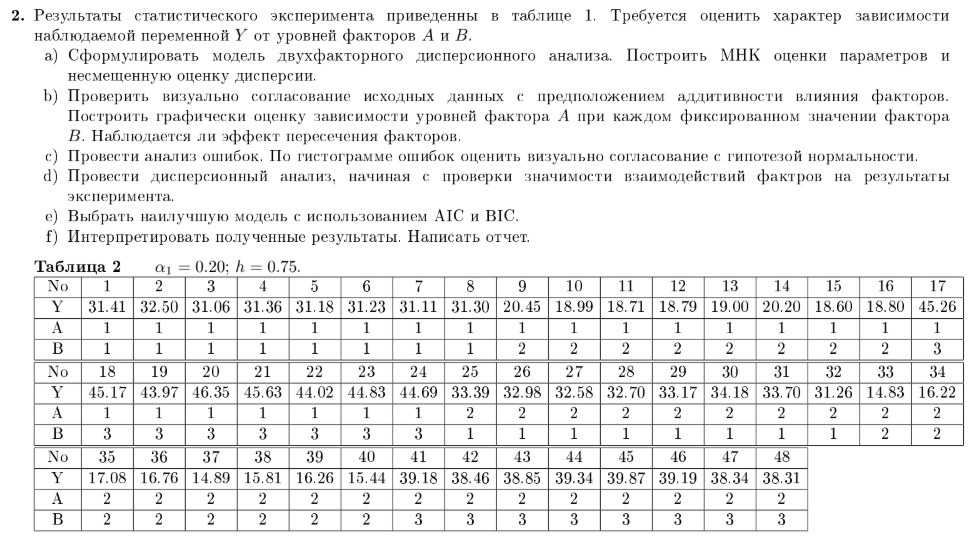

In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

alpha1 = 0.20
h = 0.75

Y_data = [
    31.41, 32.50, 31.06, 31.36, 31.18, 31.23, 31.11, 31.30, 20.45, 18.99,
    18.71, 18.79, 19.00, 20.20, 18.60, 18.80, 45.26, 45.17, 43.97, 46.35,
    45.63, 44.02, 44.83, 44.69, 33.39, 32.98, 32.58, 32.70, 33.17, 34.18,
    33.70, 31.26, 14.83, 16.22, 17.08, 16.76, 14.89, 15.81, 16.26, 15.44,
    39.18, 38.46, 38.85, 39.34, 39.87, 39.19, 38.34, 38.31
]

A_factor = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
]

B_factor = [
    1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
    3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
    2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3
]

df_anova = pd.DataFrame({
    'Y': Y_data,
    'A': A_factor,
    'B': B_factor
})

df_anova['A'] = df_anova['A'].astype('category')
df_anova['B'] = df_anova['B'].astype('category')

print("Данные для дисперсионного анализа:")
print(df_anova.head())
print("\nИнформация о типах данных:")
print(df_anova.info())


Данные для дисперсионного анализа:
       Y  A  B
0  31.41  1  1
1  32.50  1  1
2  31.06  1  1
3  31.36  1  1
4  31.18  1  1

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       48 non-null     float64 
 1   A       48 non-null     category
 2   B       48 non-null     category
dtypes: category(2), float64(1)
memory usage: 868.0 bytes
None


## Пункт A

In [24]:
model_full = ols('Y ~ C(A) * C(B)', data=df_anova).fit()

cell_means = df_anova.groupby(['A', 'B'], as_index=False)['Y'].mean()
cell_means = cell_means.rename(columns={'Y': 'eta_ij'})
print("МНК‑оценки η_ij (средние по группам A×B):")
print(cell_means)


SSe = model_full.ssr

n = len(df_anova)

r = int(model_full.df_model + 1)

s2 = SSe / (n - r)
print(f"SSe = {SSe:.4f}, n = {n:d}, r = {r:d}, s2 = {s2:.4f}")

s2 = model_full.mse_resid
print(f"\nНесмещённая оценка дисперсии s^2 = {s2:.4f}")


МНК‑оценки η_ij (средние по группам A×B):
   A  B    eta_ij
0  1  1  31.39375
1  1  2  19.19250
2  1  3  44.99000
3  2  1  32.99500
4  2  2  15.91125
5  2  3  38.94250
SSe = 21.7798, n = 48, r = 6, s2 = 0.5186

Несмещённая оценка дисперсии s^2 = 0.5186


C:\Users\tem\AppData\Local\Temp\ipykernel_2612\2724063927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_means = df_anova.groupby(['A', 'B'], as_index=False)['Y'].mean()


## Пункт B

   A  B    eta_ij
0  1  1  31.39375
1  1  2  19.19250
2  1  3  44.99000
3  2  1  32.99500
4  2  2  15.91125
5  2  3  38.94250

Матрица η_ij (строки A, столбцы B):
          1       2         3
1  31.39375  44.990  15.91125
2  19.19250  32.995  38.94250


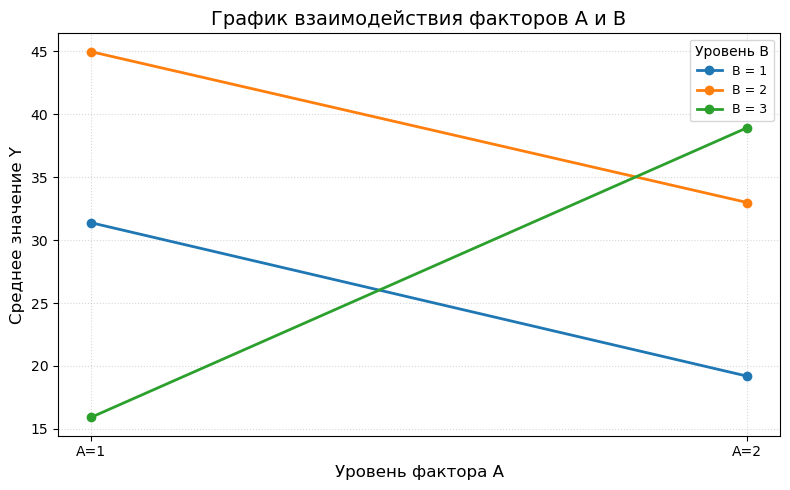

In [25]:
cell_means_sorted = cell_means.sort_values(['A', 'B']).reset_index(drop=True)
print(cell_means_sorted)

levels_A = sorted(cell_means_sorted['A'].unique())
levels_B = sorted(cell_means_sorted['B'].unique())

nA = len(levels_A)
nB = len(levels_B)

interaction_matrix = cell_means_sorted['eta_ij'].to_numpy().reshape(nA, nB, order='F')
print("\nМатрица η_ij (строки A, столбцы B):")
print(pd.DataFrame(interaction_matrix, index=levels_A, columns=levels_B))

plt.figure(figsize=(8, 5))

x_vals = np.arange(1, nA + 1)
colors = ['tab:blue', 'tab:orange', 'tab:green']

for j, b_level in enumerate(levels_B):
    y_vals = interaction_matrix[:, j]
    plt.plot(
        x_vals,
        y_vals,
        marker='o',
        linewidth=2,
        color=colors[j % len(colors)],
        label=f'B = {b_level}'
    )

plt.title('График взаимодействия факторов A и B', fontsize=14)
plt.xlabel('Уровень фактора A', fontsize=12)
plt.ylabel('Среднее значение Y', fontsize=12)
plt.xticks(x_vals, [f'A={a}' for a in levels_A])
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend(title='Уровень B', fontsize=9, title_fontsize=10, loc='best')

plt.tight_layout()
plt.show()


## Пункт C

n = 48, s^2 = 0.5186, s = 0.7201
Границы интервалов (шаг h = 0.75):
  [-2.2500, -1.5000)
  [-1.5000, -0.7500)
  [-0.7500,  0.0000)
  [ 0.0000,  0.7500)
  [ 0.7500,  1.5000)

Частоты в интервалах (ν_j): [ 1  4 23 12  8]
Сумма частот: 48


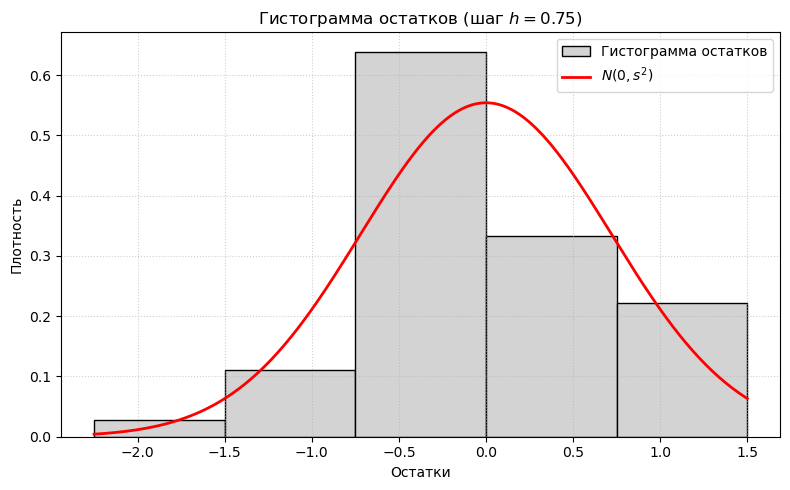

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

res = model_full.resid.values
n = len(res)
s2 = model_full.mse_resid
s_hat = np.sqrt(s2)

print(f"n = {n}, s^2 = {s2:.4f}, s = {s_hat:.4f}")

# --- Шаг h ---
h = 0.75

# Границы интервалов с шагом h (с небольшим запасом по краям)
x_min = res.min()
x_max = res.max()
left = np.floor(x_min / h) * h
right = np.ceil(x_max / h) * h
bins = np.arange(left, right + h, h)

print("Границы интервалов (шаг h = 0.75):")
for i in range(len(bins) - 1):
    print(f"  [{bins[i]: .4f}, {bins[i+1]: .4f})")

# Частоты по этим интервалам
counts, edges = np.histogram(res, bins=bins)
print("\nЧастоты в интервалах (ν_j):", counts)
print("Сумма частот:", counts.sum())

# --- Исходная гистограмма + нормальная кривая ---
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(res, bins=bins, density=True,
        color='lightgray', edgecolor='black', label='Гистограмма остатков')

x_plot = np.linspace(edges[0], edges[-1], 300)
ax.plot(x_plot, stats.norm.pdf(x_plot, loc=0.0, scale=s_hat),
        'r-', lw=2, label=r'$N(0,s^2)$')

ax.set_title('Гистограмма остатков (шаг $h = 0.75$)')
ax.set_xlabel('Остатки')
ax.set_ylabel('Плотность')
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()


n = 48, s^2 = 0.5186, s = 0.7201
Исходные частоты: [ 1  4 23 12  8]
Границы: [-2.25 -1.5  -0.75  0.    0.75  1.5 ]
Границы после объединения: [-2.25 -0.75  0.    0.75  1.5 ]
Частоты после объединения: [ 5 23 12  8]


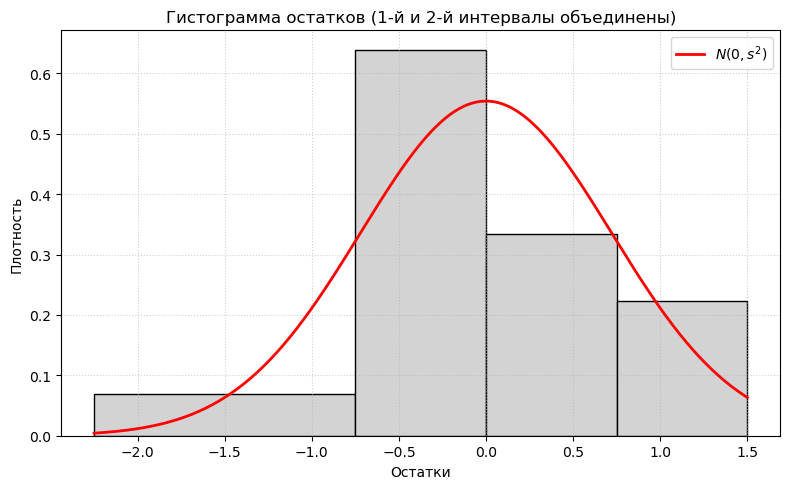

Минимальное χ² = 4.1449
Оптимальная σ = 0.6752
df = 2, p-value = 0.1259


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize_scalar

# Остатки и параметры модели
res = model_full.resid.values
n = len(res)
s2 = model_full.mse_resid
s_hat = np.sqrt(s2)

print(f"n = {n}, s^2 = {s2:.4f}, s = {s_hat:.4f}")

# --- 1. Исходные интервалы с шагом h = 0.75 ---
h = 0.75
left = -2.25    # из предыдущего шага
right = 1.50
bins = np.arange(left, right + h, h)   # [-2.25,-1.5,-0.75,0,0.75,1.5]

counts, edges = np.histogram(res, bins=bins)
print("Исходные частоты:", counts)
print("Границы:", edges)

# --- 2. Объединяем первый и второй интервалы ---
merged_edges = np.array([-2.25, -0.75, 0.0, 0.75, 1.5])
merged_counts = np.array([
    counts[0] + counts[1],  # [-2.25,-0.75)
    counts[2],              # [-0.75,0)
    counts[3],              # [0,0.75)
    counts[4]               # [0.75,1.5)
], dtype=int)

print("Границы после объединения:", merged_edges)
print("Частоты после объединения:", merged_counts)

# --- 3. Гистограмма по объединённым группам + нормальная плотность ---
fig, ax = plt.subplots(figsize=(8, 5))

for j in range(len(merged_counts)):
    a = merged_edges[j]
    b = merged_edges[j+1]
    height = merged_counts[j] / (n * (b - a))  # плотность в столбике
    ax.bar((a + b) / 2, height, width=(b - a),
           align='center', color='lightgray', edgecolor='black')

x_plot = np.linspace(merged_edges[0], merged_edges[-1], 300)
ax.plot(x_plot, stats.norm.pdf(x_plot, loc=0.0, scale=s_hat),
        'r-', lw=2, label=r'$N(0,s^2)$')

ax.set_title('Гистограмма остатков (1-й и 2-й интервалы объединены)')
ax.set_xlabel('Остатки')
ax.set_ylabel('Плотность')
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend()
plt.tight_layout()
plt.show()

# --- 4. χ²-критерий для этих групп ---
brk_chi = merged_edges.copy()
brk_chi[0] = -np.inf
brk_chi[-1] = np.inf

def chi2_stat(sigma):
    if sigma <= 0:
        return np.inf
    p = stats.norm.cdf(brk_chi[1:], 0.0, sigma) - stats.norm.cdf(brk_chi[:-1], 0.0, sigma)
    if np.any(p < 1e-10):
        return np.inf
    expected = n * p
    return np.sum((merged_counts - expected) ** 2 / expected)

opt = minimize_scalar(chi2_stat, bounds=(s_hat/3, s_hat*3), method='bounded')
chi2_min = opt.fun
sigma_opt = opt.x

r_groups = len(merged_counts)
df = r_groups - 1 - 1   # r - 1 - число оцениваемых параметров (σ)

p_value = stats.chi2.sf(chi2_min, df)

print(f"Минимальное χ² = {chi2_min:.4f}")
print(f"Оптимальная σ = {sigma_opt:.4f}")
print(f"df = {df}, p-value = {p_value:.4f}")


## Пункт D

In [33]:
# --- 1. Построение полной модели ---
# Формула 'Y ~ C(A) * C(B)' автоматически включает главные эффекты A, B и их взаимодействие A:B
model = ols('Y ~ C(A) * C(B)', data=df_anova).fit()

# --- 2. Автоматическая генерация таблицы ANOVA ---
# typ=1 или typ=2 подходят для сбалансированных данных (у вас равное число наблюдений в группах)
anova_table = anova_lm(model, typ=2)

# Переименуем индексы для наглядности
anova_table.index = ['H_(1) (Фактор A)', 'H_(2) (Фактор B)', 'H_(12) (Взаимодействие)', 'Residual']

# --- 3. Расчет критических значений и вывод ---
# Добавим критическое F-значение в таблицу для удобства
# F_crit = F.ppf(1 - alpha, df_num, df_denom)
anova_table['F_crit(0.20)'] = anova_table.apply(
    lambda row: stats.f.ppf(1 - alpha1, row['df'], model.df_resid) 
    if row.name != 'Residual' else np.nan, axis=1
)

print("\n--- Результаты дисперсионного анализа (Автоматический метод) ---")
print(anova_table)

# --- 4. Проверка "Полной модели" (H0) ---
# statsmodels не выводит строку "Total Model" в стандартной таблице anova_lm,
# но мы можем получить её параметры (F-statistic и Prob (F-statistic)) прямо из summary модели.
print("\n--- Проверка H_(0) (Полная модель против константы) ---")
print(f"F-statistic (Full Model): {model.fvalue:.4f}")
print(f"Prob (F-statistic):       {model.f_pvalue:.4e}")

# Для полной модели степени свободы:
df_model = model.df_model
df_resid = model.df_resid
F_crit_full = stats.f.ppf(1 - alpha1, df_model, df_resid)
print(f"F_crit(0.20) (Full Model):  {F_crit_full:.4f}")



--- Результаты дисперсионного анализа (Автоматический метод) ---
                              sum_sq    df            F        PR(>F)  \
H_(1) (Фактор A)           79.619008   1.0   153.536864  1.288282e-15   
H_(2) (Фактор B)         4831.754954   2.0  4658.765026  4.919265e-50   
H_(12) (Взаимодействие)   119.992429   2.0   115.696375  8.235847e-18   
Residual                   21.779775  42.0          NaN           NaN   

                         F_crit(0.20)  
H_(1) (Фактор A)             1.695296  
H_(2) (Фактор B)             1.672718  
H_(12) (Взаимодействие)      1.672718  
Residual                          NaN  

--- Проверка H_(0) (Полная модель против константы) ---
F-statistic (Full Model): 1940.4919
Prob (F-statistic):       1.6555e-48
F_crit(0.20) (Full Model):  1.5340


## Пункт E


In [29]:
import pandas as pd
from statsmodels.formula.api import ols

alpha1 = 0.20  # уже задано выше

# Модели-кандидаты
models = {
    "Full (A * B)":        ols('Y ~ C(A) * C(B)', data=df_anova).fit(),
    "Additive (A + B)":    ols('Y ~ C(A) + C(B)', data=df_anova).fit(),
    "Only A":              ols('Y ~ C(A)', data=df_anova).fit(),
    "Only B":              ols('Y ~ C(B)', data=df_anova).fit(),
    "Null (intercept)":    ols('Y ~ 1', data=df_anova).fit()
}

# Считаем AIC и BIC
rows = []
for name, m in models.items():
    rows.append({
        "Model": name,
        "AIC": m.aic,
        "BIC": m.bic
    })

info_criteria = pd.DataFrame(rows).set_index("Model")
print("Информационные критерии AIC и BIC:")
print(info_criteria)

# Выбор лучших моделей
best_aic = info_criteria['AIC'].idxmin()
best_bic = info_criteria['BIC'].idxmin()

print(f"\nЛучшая модель по AIC: {best_aic}")
print(f"Лучшая модель по BIC: {best_bic}")


Информационные критерии AIC и BIC:
                         AIC         BIC
Model                                   
Full (A * B)      110.287576  121.514782
Additive (A + B)  196.203086  203.687890
Only A            362.970909  366.713311
Only B            215.597154  221.210757
Null (intercept)  361.733235  363.604436

Лучшая модель по AIC: Full (A * B)
Лучшая модель по BIC: Full (A * B)
